# Darknet to Polars dataset

Before start datasets transformations we need to install dvc by calling 

```pip install dvc```

In [ ]:
! pip install dvc

## Download Dataset

To download the dataset we are going to clone playingcards dataset from github.
This dataset is stored in darknet format and has two different partitions, `train` and `validate`

In [ ]:
! git clone https://github.com/DeepViewML/playingcards.git 

Once the repository is in our PC we need to invoke dvc to download dataset files from S3 bucket.
It could take few minutes based on you internet connection

In [ ]:
! cd playingcards && dvc pull

In [ ]:
# Count number of training images

! echo "Training Instances:"


! echo "   - images:" `ls -l playingcards/dataset/images/train | wc -l`
! echo "   - annotations:" `ls -l playingcards/dataset/labels/train | wc -l`

! echo "Validation Instances:"

! echo "   - images:" `ls -l playingcards/dataset/images/validate | wc -l`
! echo "   - annotations:" `ls -l playingcards/dataset/labels/validate | wc -l`

! echo "Quantization Samples:"

! echo "   - images:" `ls -l playingcards/dataset/images/quant | wc -l`


In [ ]:
import sys
sys.path.insert(0, "../../python")

In [ ]:
from deepview.nn.datasets.readers import DarknetDetectionReader
from deepview.nn.datasets.writers.polars import PolarsDetectionWriter

In [ ]:
# Reading Classes from dataset

import yaml
with open("playingcards/dataset.yaml", 'r') as fp:
    classes = yaml.safe_load(fp).get('classes')

In [ ]:
# Defines the reader class that loads dataset images and annotations from 
# disk and return the iterator for safe reading

train_reader = DarknetDetectionReader(
    images="playingcards/dataset/images/train",
    annotations="playingcards/dataset/labels/train",
    classes=classes
)

val_reader = DarknetDetectionReader(
    images="playingcards/dataset/images/validate",
    annotations="playingcards/dataset/labels/validate",
    classes=classes
)

In [ ]:
# Defines the writer instance that loads the Darknet reader object and writes the instances
# to hard drive in arrow format

train_writer = PolarsDetectionWriter(
    reader=train_reader,
    output="playingcards-polars/train",
    override=True,
    max_file_size=2.0 # 2GB file chunk
)

val_writer = PolarsDetectionWriter(
    reader=val_reader,
    output="playingcards-polars/validate",
    override=True,
    max_file_size=2.0 # 2GB file chunk
)

train_writer.export()
val_writer.export()


In [ ]:
# dataset is going to be saved into playingcards-polars folder

! tree -a playingcards-polars/train
! tree -a playingcards-polars/validate

## Reading Dataset

To read the dataset we need to use the polars reader from example below.

In [1]:
import sys
sys.path.insert(0, "../../python")
from deepview.nn.datasets.readers import PolarsDetectionReader

In [2]:
# load polars dataset

train_reader_polars = PolarsDetectionReader(
    inputs="playingcards-polars/train/images_*.arrow",
    annotations="playingcards-polars/train/boxes_*.arrow",
    classes=["ace", "five"]
)

train_reader_polars.classes, len(train_reader_polars)

(['ace', 'five'], 393)

In [3]:
# visualize samples.
# To visualize samples make sure opencv-python and matplotlib are installed.
import matplotlib.pyplot as plt
import numpy as np
import cv2
import polars as pl

colors = np.array([
    [180, 0, 0],
    [0, 166, 76],
    [178, 179, 0],
    [2, 1, 181],
    [127, 96, 166],
    [3, 152, 133],
    [121, 121, 121],
    [76, 0, 0],
    [240, 0, 0],
    [107, 123, 61],
    [245, 185, 0],
    [94, 78, 127],
    [202, 2, 202],
    [105, 153, 199],
    [252, 155, 209],
    [53, 76, 32],
    [146, 76, 17],
    [0, 219, 99],
    [142, 206, 70],
    [2, 71, 128]    
], np.uint8)

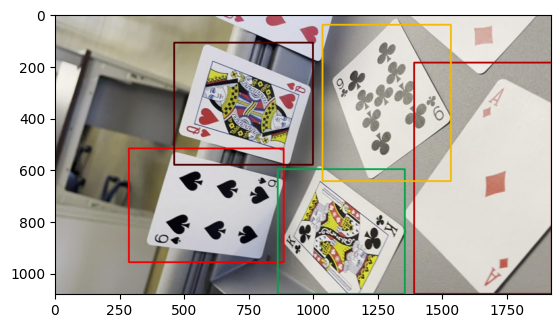

In [4]:
image, boxes = next(train_reader_polars)
H, W, _ = image.shape

for xc, yc, w, h, l in boxes:
    x1 = int((xc - w * 0.5) * W)
    x2 = int((xc + w * 0.5) * W)
    
    y1 = int((yc - h *0.5) * H)
    y2 = int((yc + h *0.5) * H)
    color = colors[int(l)].tolist()
        
    cv2.rectangle(image, (x1, y1), (x2, y2), color, 5)

plt.imshow(image)


In [8]:
train_reader_polars.__annotations_ids__[0]
train_reader_polars[0]

(array([[[197, 193, 190],
         [197, 193, 190],
         [197, 193, 190],
         ...,
         [169, 164, 158],
         [167, 162, 156],
         [166, 161, 155]],
 
        [[197, 193, 190],
         [197, 193, 190],
         [197, 193, 190],
         ...,
         [169, 164, 158],
         [167, 162, 156],
         [166, 161, 155]],
 
        [[197, 193, 190],
         [197, 193, 190],
         [197, 193, 190],
         ...,
         [169, 164, 158],
         [168, 163, 157],
         [167, 162, 156]],
 
        ...,
 
        [[168, 167, 163],
         [168, 167, 163],
         [168, 167, 163],
         ...,
         [155, 152, 145],
         [155, 152, 145],
         [155, 152, 145]],
 
        [[169, 168, 164],
         [169, 168, 164],
         [169, 168, 164],
         ...,
         [155, 152, 145],
         [155, 152, 145],
         [155, 152, 145]],
 
        [[170, 169, 165],
         [170, 169, 165],
         [170, 169, 165],
         ...,
         [156, 153, 146],
  